TCLab version 1.0.0
Simulated TCLab
<class 'float'>
0s: T=20.95, u=100.00
<class 'float'>
1s: T=20.95, u=100.00
<class 'float'>
2s: T=20.95, u=100.00
<class 'float'>
3s: T=20.95, u=100.00
<class 'float'>
4s: T=20.95, u=100.00
<class 'float'>
5s: T=20.95, u=100.00
<class 'float'>
6s: T=21.27, u=100.00
<class 'float'>
7s: T=21.27, u=100.00
<class 'float'>
8s: T=21.59, u=100.00
<class 'float'>
9s: T=21.59, u=100.00
<class 'float'>
10s: T=21.92, u=100.00
<class 'float'>
11s: T=21.92, u=100.00
<class 'float'>
12s: T=22.24, u=100.00
<class 'float'>
13s: T=22.56, u=100.00
<class 'float'>
14s: T=22.56, u=100.00
<class 'float'>
15s: T=22.88, u=100.00
<class 'float'>
16s: T=23.21, u=100.00
<class 'float'>
17s: T=23.53, u=100.00
<class 'float'>
18s: T=23.53, u=100.00
<class 'float'>
19s: T=23.85, u=100.00
<class 'float'>
20s: T=24.17, u=100.00
<class 'float'>
21s: T=24.49, u=100.00
<class 'float'>
22s: T=24.82, u=100.00
<class 'float'>
23s: T=25.14, u=100.00
<class 'float'>
24s: T=25.14, u=100.00

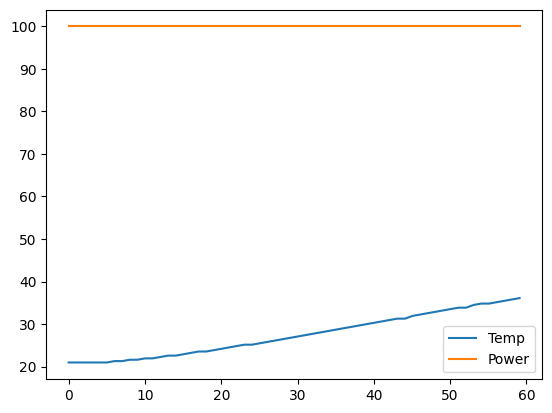

In [6]:
from tclab import setup
import time
import matplotlib.pyplot as plt

lab = setup(connected=False)

env= lab()

setpoint = 50
Kp, Ki, Kd = 5, 0.1, 0.0
integral = 0
last_error = 0

temps, powers, times = [], [], []

start = time.time()
for i in range(60):
    t = time.time() - start
    T = env.T1
    print(type(T)) 
    error = setpoint - T
    integral += error
    derivative = error - last_error

    u = Kp*error + Ki*integral + Kd*derivative
    u = max(0, min(100, u))
    env.Q1(u)

    last_error = error
    times.append(t)
    temps.append(T)
    powers.append(u)
    
    print(f"{i}s: T={T:.2f}, u={u:.2f}")
    time.sleep(1)

env.Q1(0)
env.close()

plt.plot(times, temps, label='Temp')
plt.plot(times, powers, label='Power')
plt.legend()
plt.show()
